### Data Collection
- The Dataset is part of office of Foreign Labor Certification(OFLC)
- The data consists of 25480 Rows and 12 Columns

### Import Data and Required Packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings 

warnings.filterwarnings("ignore")
%matplotlib inline

In [3]:
df = pd.read_csv("EasyVisa.csv")
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [4]:
df.shape

(25480, 12)

In [5]:
df.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


In [6]:
# exploring Data
# Define numerical & categorical  columns
numeric_features= [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features= [feature for feature in df.columns if df[feature].dtype == 'O']

print("We have {} nummerical features: {}".format(len(numeric_features), numeric_features))
print("\nWe have {} categorical features: {}".format(len(categorical_features), categorical_features))


We have 3 nummerical features: ['no_of_employees', 'yr_of_estab', 'prevailing_wage']

We have 9 categorical features: ['case_id', 'continent', 'education_of_employee', 'has_job_experience', 'requires_job_training', 'region_of_employment', 'unit_of_wage', 'full_time_position', 'case_status']


In [7]:
# proportion of count data on categorical columns
for col in categorical_features:
    print(df[col].value_counts(normalize=True) * 100)
    print("======================================")

case_id
EZYV01       0.003925
EZYV16995    0.003925
EZYV16993    0.003925
EZYV16992    0.003925
EZYV16991    0.003925
               ...   
EZYV8492     0.003925
EZYV8491     0.003925
EZYV8490     0.003925
EZYV8489     0.003925
EZYV25480    0.003925
Name: proportion, Length: 25480, dtype: float64
continent
Asia             66.173469
Europe           14.646782
North America    12.919937
South America     3.343799
Africa            2.162480
Oceania           0.753532
Name: proportion, dtype: float64
education_of_employee
Bachelor's     40.164835
Master's       37.810047
High School    13.422292
Doctorate       8.602826
Name: proportion, dtype: float64
has_job_experience
Y    58.092622
N    41.907378
Name: proportion, dtype: float64
requires_job_training
N    88.402669
Y    11.597331
Name: proportion, dtype: float64
region_of_employment
Northeast    28.237834
South        27.539246
West         25.847724
Midwest      16.903454
Island        1.471743
Name: proportion, dtype: float64
unit_o

Insights
- case_id have unique values for each column which can be dropped as it if no imporatance
- continent column  is highly baised towords aisa. Hence we can combine other categories to form a single category.
- unit_of_wage seems to be an important column as most of them are yearly contracts.

- Univariate Analysis
- Bivariate Analysis
- Multivariate Analysis

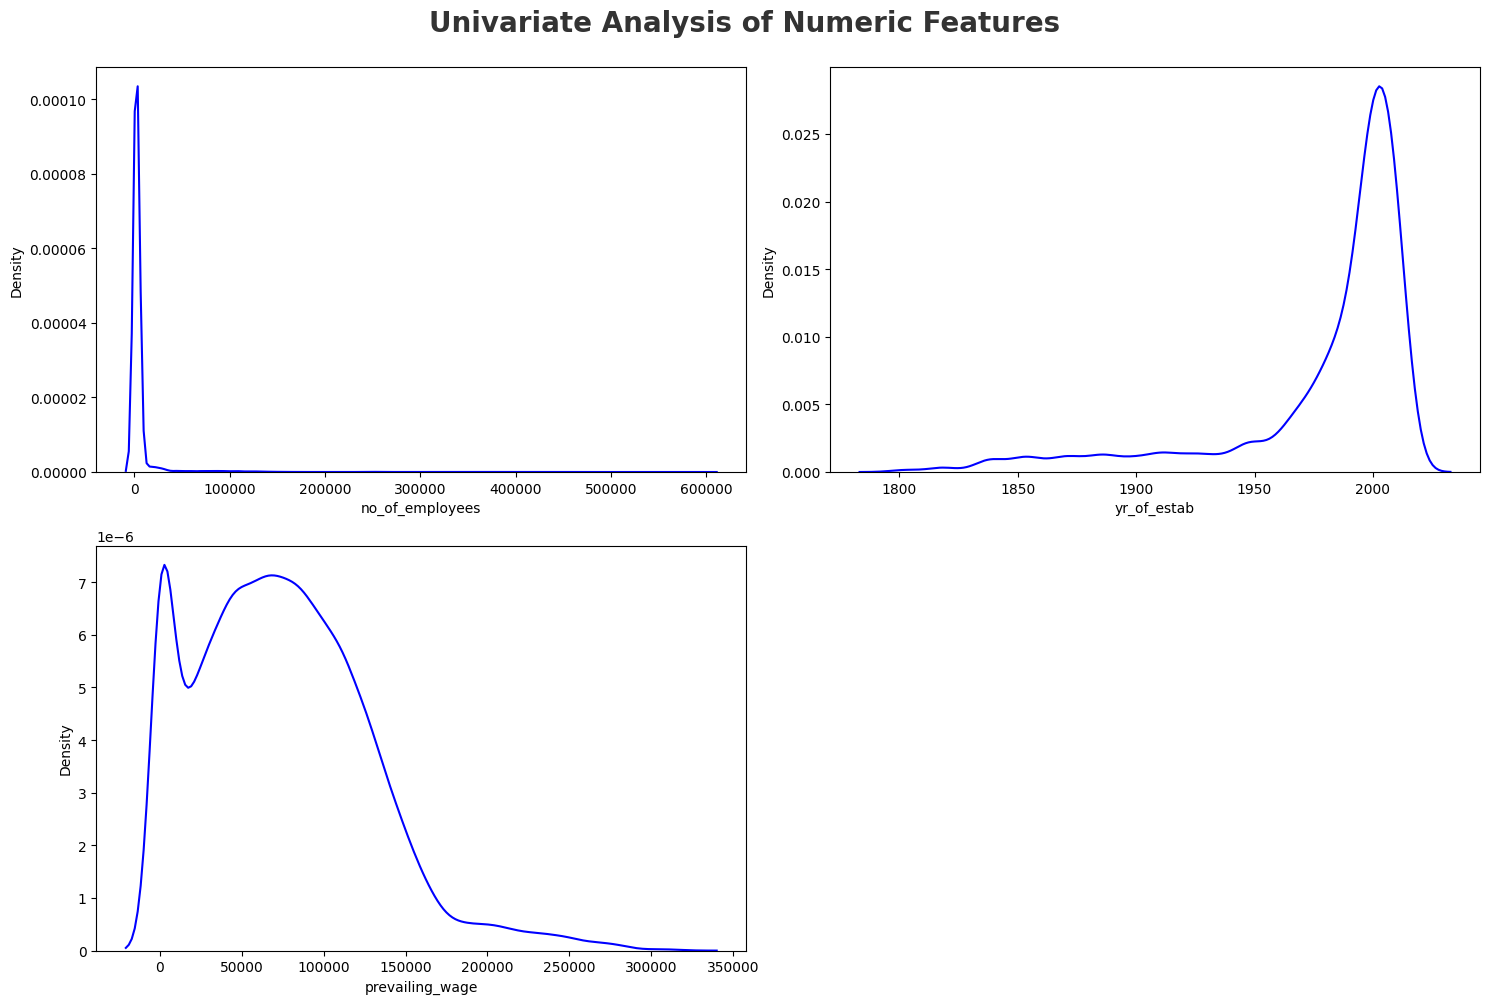

In [8]:
plt.figure(figsize = (15,10))
plt.suptitle("Univariate Analysis of Numeric Features", fontsize=20, fontweight="bold", alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(2, 2, i+1)
    sns.kdeplot(x=df[numeric_features[i]], color="blue")
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

Insights
- no_of_employees column looks more skewed but it may be becaouse of outlies.
- yr_of_estab is a discrete feature
- privailing_wage is a right-skewed distribution 

#### Categorical Features

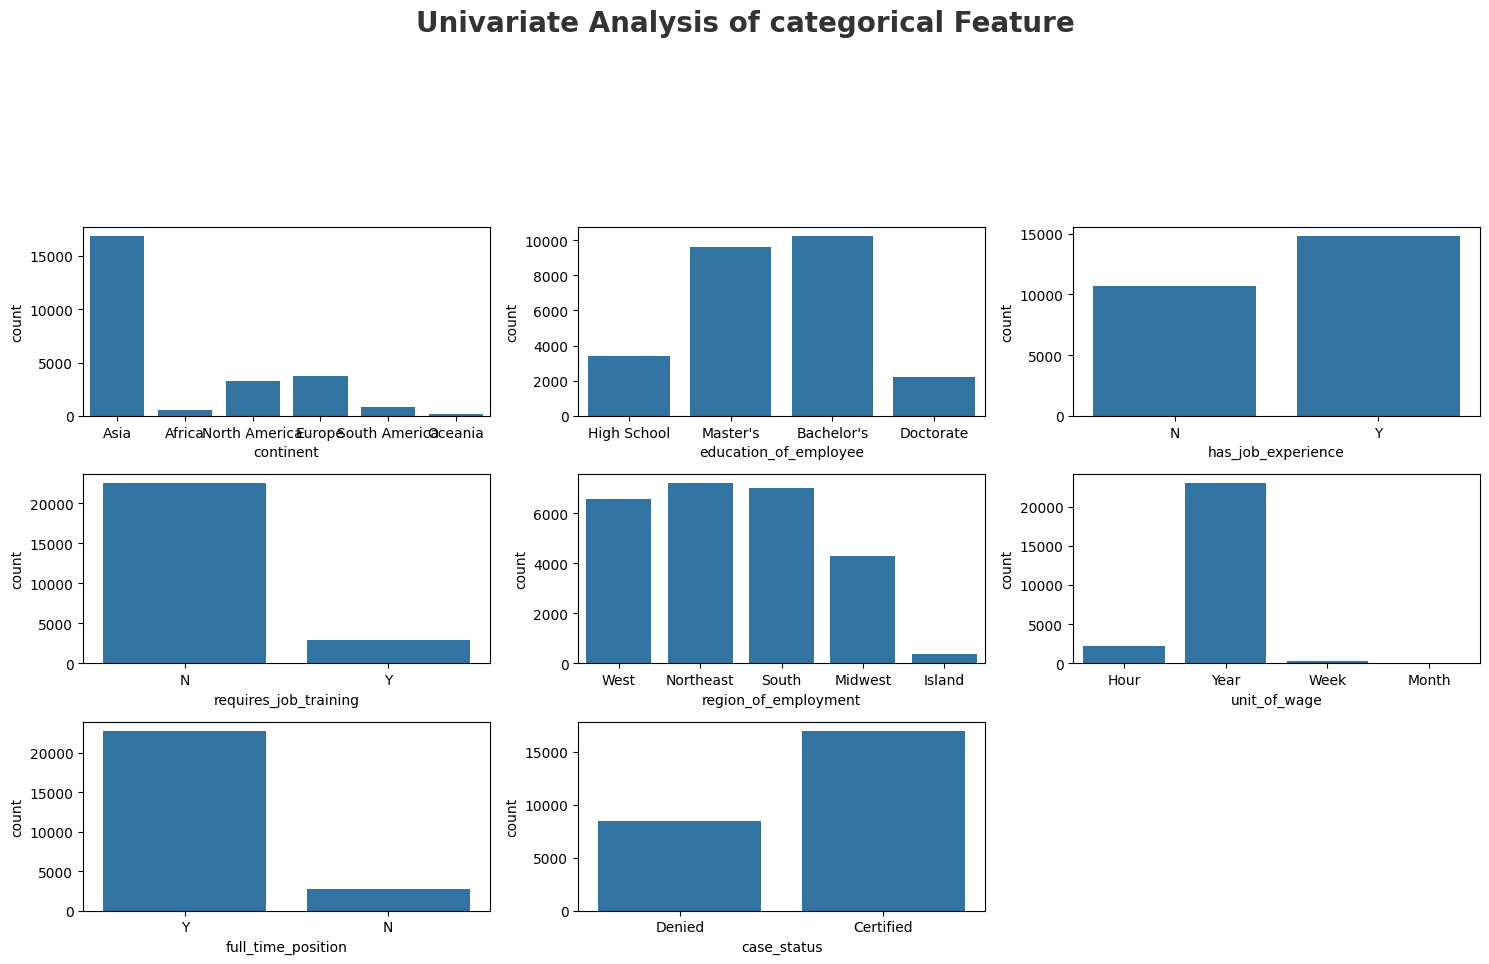

In [9]:
# categorical columns
categorical_features.remove("case_id")
plt.figure(figsize=(15, 8))

plt.suptitle("Univariate Analysis of categorical Feature", fontsize=20, fontweight='bold', alpha=0.8, y=1.2)

for i in range(0, len(categorical_features)):
    plt.subplot(3, 3, i+1)
    sns.countplot(x=df[categorical_features[i]])
    plt.xlabel(categorical_features[i])
    plt.tight_layout()


Insights
- requires_job_training, unit_of_wage, full_time_position, and continents cloumns have single  category dominating.
- In rest of the columns are balanced.

### Multivariate Analysis
- Multivariate analysis is the analysis of more than one variable.

In [10]:
discrete_features = [feature for feature in numeric_features if len(df[feature].unique()) <= 25 ]
continous_features = [feature for feature in numeric_features if len(df[feature].unique()) >= 25 ]

print("We have {} discrete features: {}".format(len(discrete_features), discrete_features))
print("\nWe have {} continuous_features: {}".format(len(continous_features), continous_features))


We have 0 discrete features: []

We have 3 continuous_features: ['no_of_employees', 'yr_of_estab', 'prevailing_wage']


### Check Multicollinearity for Categorical fatures

- A chi-squared test is a statistical hupothesis test that is valid to perform when the test statistic is chi-squared distributed under the null hypothesis, specifically Pearson's chi-squared test.
- A chi-square statistic is one way to show a relationship between two categorical variables.
- Here we test correlation of categorical columns with Target column i.e case_status

- Null Hypothesis(Ho) : The feature is independent of target column(No-Correlation)
- Alternative Hypothesis(H1): The feature and Target column are independent(Correlated)

In [11]:
from scipy.stats import chi2_contingency
chi2_test = []
for feature in categorical_features:
    if chi2_contingency(pd.crosstab(df["case_status"], df[feature]))[1] < 0.05:
        chi2_test.append("Reject Null Hypothesis")
    else:
        chi2_test.append("Fail to Reject Null Hypothesis")

result = pd.DataFrame(data = [categorical_features, chi2_test]).T 
result.columns = ['Column', "Hypothesis Result"]
result

,Column,Hypothesis Result
0,continent,Reject Null Hypothesis
1,education_of_employee,Reject Null Hypothesis
2,has_job_experience,Reject Null Hypothesis
3,requires_job_training,Fail to Reject Null Hypothesis
4,region_of_employment,Reject Null Hypothesis
5,unit_of_wage,Reject Null Hypothesis
6,full_time_position,Reject Null Hypothesis
7,case_status,Reject Null Hypothesis


### Report
- Here requires_job_training fails to Reject Null Hypothesis which means it doesn't correlate with target column.

In [12]:
# Checking null values
df.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

In [13]:
continues_features = [feature for feature in numeric_features if len(df[feature].unique()) >= 10]
print("Num of continues features: ", continues_features)

Num of continues features:  ['no_of_employees', 'yr_of_estab', 'prevailing_wage']


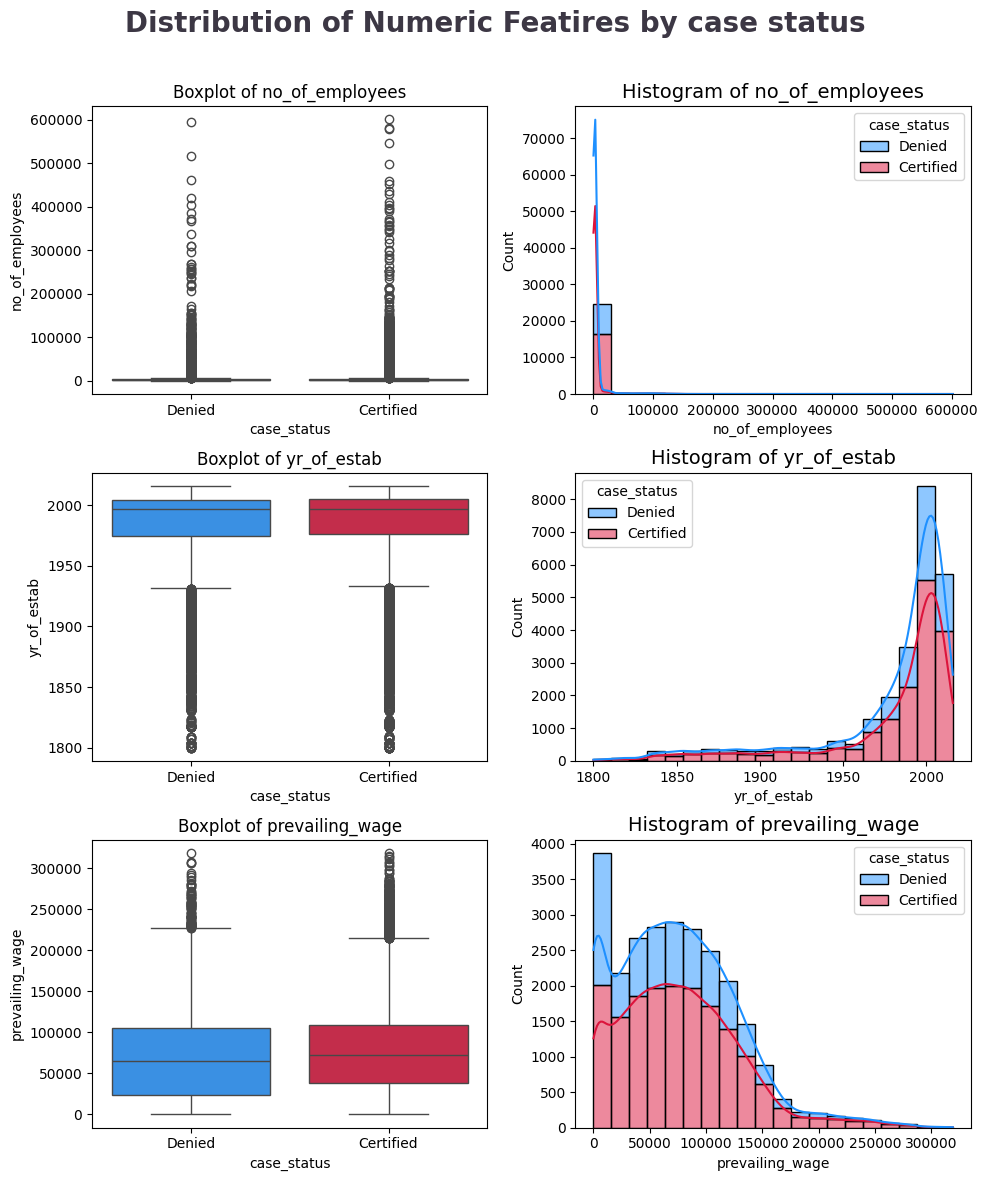

In [15]:
clrl = ['#1E90FF' , '#DC143C']
fig, ax = plt.subplots(3, 2, figsize= (10,12))
fig.suptitle("Distribution of Numeric Featires by case status", color='#3C3744',
             fontsize= 20, fontweight="bold", ha="center")
for i, col in enumerate(continues_features):
    sns.boxplot(data=df, x="case_status", y=col, palette=clrl, ax=ax[i,0])
    ax[i,0].set_title(f"Boxplot of {col}", fontsize=12)
    sns.histplot(data=df, x=col, hue='case_status', bins=20, kde=True,
                 multiple='stack', palette=clrl, ax=ax[i, 1])
    ax[i, 1].set_title(f"Histogram of {col}", fontsize=14)
    
fig.tight_layout()
fig.subplots_adjust(top=0.90)


#### Initial Analysis Report
- No of Enployees has many outliers which can be Handled in fearture Engg and no_of_employees is Right skewed.
- yr_of_estab is left skewed and some outliers below the lower bound of Boxplot
- prevailling_wage is right skewed with outliers above the upper bound of box plot.
- There are No missing values in the dataset.
- The case_id column can be deleted because each row has unique values.
- The case_status column is the target to predict.
- In the Categorical column features can be made Binary numerical in featire Encoding.

#### Visualize the taregt feature

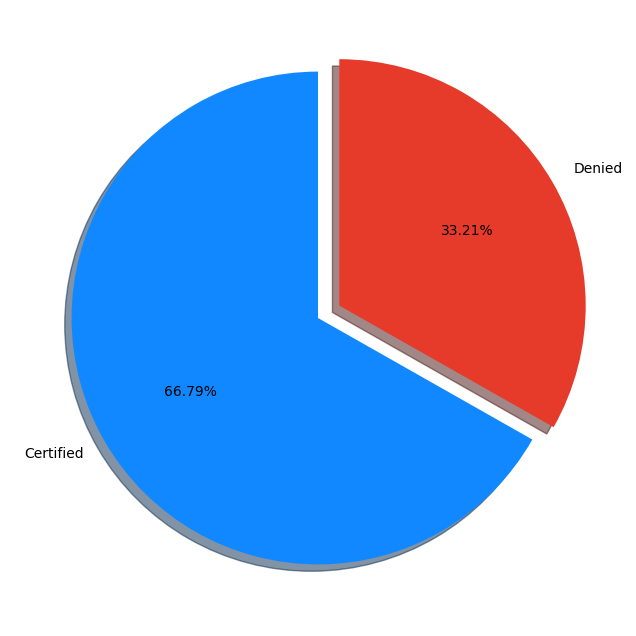

In [17]:
percentage = df.case_status.value_counts(normalize=True)*100
labels = ["Certified", "Denied"]

fig,ax = plt.subplots(figsize=(15, 8))
explode = (0, 0.1)
colors = ["#1188ff", '#e63a2a']
ax.pie(percentage, labels = labels, startangle =90,
       autopct ='%1.2f%%', explode= explode, shadow=True, colors=colors)
plt.show()


- From the chart it is seen that the Target Variable is imbalanced.

In [18]:
# Group data by continent and thier count of case_status
df.groupby('continent')['case_status'].value_counts(normalize=True).to_frame()*100

proportion
continent     case_status            
Africa        Certified     72.050817
              Denied        27.949183
Asia          Certified     65.310480
              Denied        34.689520
Europe        Certified     79.233655
              Denied        20.766345
North America Certified     61.877278
              Denied        38.122722
Oceania       Certified     63.541667
              Denied        36.458333
South America Certified     57.863850
              Denied        42.136150